In [2]:
# My usual setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas 
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster') 
import numpy as np

# Sonify Hurricane Sandy mph over time ** Important to use same scale is Katrina for comparison.
- Original tutorial https://github.com/cirlabs/miditime
- I handle most manipulations in dataframe for ease of IO

## First, format hurricane files

In [3]:
df = pandas.read_csv('../data/SANDY-2012.csv', skiprows=1,usecols=[0,1,6], names=['date','time','mph'])

In [7]:
df.head()

,date,time,mph
0,20121021,1800,25
1,20121022,0,25
2,20121022,600,25
3,20121022,1200,30
4,20121022,1800,35


In [8]:
# fill zeroes
df['timestr'] = df.time.apply(lambda x: str(x).zfill(4))

In [9]:
df['datetime'] = pandas.to_datetime(df.apply(lambda x: str(x['date']) + x['timestr'], axis=1), format="%Y%m%d%H%M")

In [11]:
print(df.datetime.max())
print(df.datetime.min())

2012-10-31 12:00:00
2012-10-21 18:00:00


In [12]:
df.to_csv("../data/SANDY-2012-dateformatted.csv")

## Chart data + compare with Katrina

In [14]:
katrina = pandas.read_csv('../data/KATRINA-2005-dateformatted.csv')

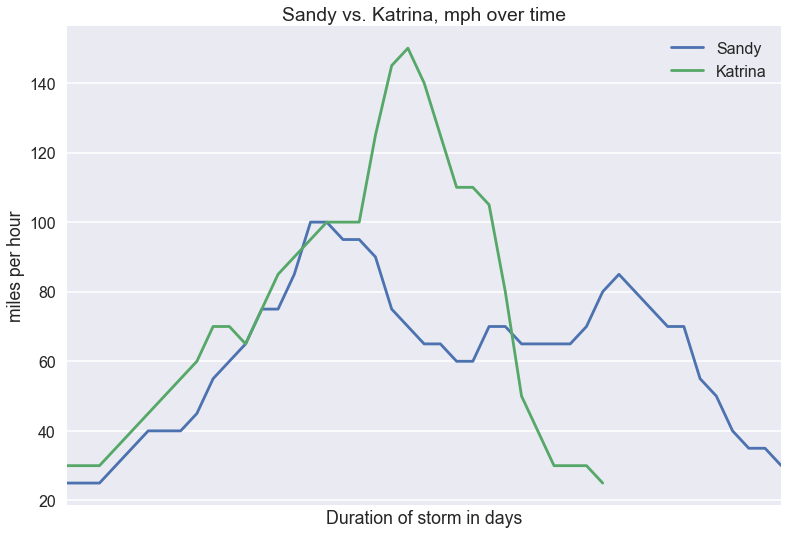

In [67]:
ax = df[['datetime','mph']].plot() 
katrina[['datetime','mph']].plot(ax=ax)
plt.title("Sandy vs. Katrina, mph over time")
plt.legend(['Sandy','Katrina'])
plt.xticks([])
plt.xlabel("Duration of storm in days")
plt.ylabel("miles per hour")

## MIDITime initialization

Instantiate the class with a tempo (120bpm is the default), an output file destination, the number of seconds you want to represent a year in the final song (default is 5 sec/year), the base octave (C5 is middle C, so the default is 5, and how many octaves you want your output to range over (default is 1).

In [24]:
from miditime.miditime import MIDITime
BPM = 120
FILENAME = '../audio/sandy-sonify.mid'
SEC_PER_YEAR = 365
BASE_OCTAVE = 5
OCTAVES = 1

mymidi = MIDITime(BPM,FILENAME, SEC_PER_YEAR, BASE_OCTAVE, OCTAVES)

Convert your date/time data into an integer, like days since the epoch (Jan. 1, 1970). You can use the days_since_epoch() helper method, or not:

In [25]:
df['epoched'] = df.datetime.apply(lambda x: mymidi.days_since_epoch(x))

## Our data spans only 8 days

Convert your integer date/time to something reasonable for a song. For example, at 120 beats per minute, you'll need to scale the data down a lot to avoid a very long song if your data spans years. This uses the seconds_per_year attribute you set at the top, so if your date is converted to something other than days you may need to do your own conversion. But if your dataset spans years and your dates are in days (with fractions is fine), use the beat() helper method.

In [27]:
df['beat'] = df['epoched'].apply(lambda x: mymidi.beat(x))

In [28]:
START_TIME = df.beat.min() # beat doesn't start at 0 since we scaled our epoch seconds, so we just start at the first one.
print(START_TIME)

31248.1


In [32]:
df.head(45)

,date,time,mph,timestr,datetime,epoched,beat
0,20121021,1800,25,1800,2012-10-21 18:00:00,15634.750000,31248.10
1,20121022,0,25,0000,2012-10-22 00:00:00,15635.000000,31248.60
2,20121022,600,25,0600,2012-10-22 06:00:00,15635.250000,31249.10
3,20121022,1200,30,1200,2012-10-22 12:00:00,15635.500000,31249.60
4,20121022,1800,35,1800,2012-10-22 18:00:00,15635.750000,31250.10
5,20121023,0,40,0000,2012-10-23 00:00:00,15636.000000,31250.60
6,20121023,600,40,0600,2012-10-23 06:00:00,15636.250000,31251.10
7,20121023,1200,40,1200,2012-10-23 12:00:00,15636.500000,31251.59
8,20121023,1800,45,1800,2012-10-23 18:00:00,15636.750000,31252.09
9,20121024,0,55,0000,2012-10-24 00:00:00,15637.000000,31252.59


In [33]:
MAX = df.mph.max()
MIN = df.mph.min()
print(MIN,MAX)

25 100


## Create scale from mph 

Use linear scale.

In [35]:
def mag_to_pitch_tuned(mph):
    # Where does this data point sit in the domain of your data? (I.E. the min mph is 3, the max in 5.6). In this case the optional 'True' means the scale is reversed, so the highest value will return the lowest percentage.
    #scale_pct = mymidi.linear_scale_pct(MIN, MAX, mph)

    # Another option: Linear scale, reverse order
    #scale_pct = mymidi.linear_scale_pct(MIN, MAX, mph, True)

    # Another option: Logarithmic scale, reverse order
    scale_pct = mymidi.log_scale_pct(MIN, MAX, mph, True)

    # Pick a range of notes. This allows you to play in a key.
    c_major = ['C', 'D', 'E', 'F', 'G', 'A', 'B']

    #Find the note that matches your data point
    note = mymidi.scale_to_note(scale_pct, c_major)

    #Translate that note to a MIDI pitch
    midi_pitch = mymidi.note_to_midi_pitch(note)

    return midi_pitch


In [36]:
df['pitch'] = df.mph.apply(lambda x: mag_to_pitch_tuned(x))

 ### Let's also make larger mph louder. To put it on the same scale as Katrina, we set the MIN, MAX to Katrina min and max.

In [42]:
KAT_MAX = 150   
KAT_MIN = 25

In [43]:
MIN_V = 25
MAX_V = 150
df['velocity'] = df.mph.apply(lambda x: int(np.interp(x, [KAT_MIN, KAT_MAX], [25, 150])))

In [44]:
df.velocity


0      25
1      25
2      25
3      30
4      35
5      40
6      40
7      40
8      45
9      55
10     60
11     65
12     75
13     75
14     85
15    100
16    100
17     95
18     95
19     90
20     75
21     70
22     65
23     65
24     60
25     60
26     70
27     70
28     65
29     65
30     65
31     65
32     70
33     80
34     85
35     80
36     75
37     70
38     70
39     55
40     50
41     40
42     35
43     35
44     30
Name: velocity, dtype: int64

## Build note list
- I know you're not supposed to iterate through a dataframe — but it's pretty small and manegable.
- [BEAT, PITCH, VELOCITY (VOLUME), DURATION_OF_NOTE]

In [45]:
scaled_data = df.to_dict('records')

In [46]:
note_list = []  
#V = 100 # constant for now
D = 1 # duration constant for now

for d in scaled_data:
    beat = d['beat'] - START_TIME
    pitch = d['pitch']
    velocity = d['velocity']
    duration = D
    note_list.append([beat, pitch, velocity, duration])


In [47]:
note_list

[[0.0, 71, 25, 1],
 [0.5, 71, 25, 1],
 [1.0, 71, 25, 1],
 [1.5, 71, 30, 1],
 [2.0, 71, 35, 1],
 [2.5, 71, 40, 1],
 [3.0, 71, 40, 1],
 [3.4900000000016007, 71, 40, 1],
 [3.9900000000016007, 71, 45, 1],
 [4.4900000000016007, 71, 55, 1],
 [4.9900000000016007, 71, 60, 1],
 [5.4900000000016007, 71, 65, 1],
 [5.9900000000016007, 71, 75, 1],
 [6.0800000000017462, 71, 75, 1],
 [6.4900000000016007, 71, 85, 1],
 [6.9400000000023283, 71, 100, 1],
 [6.9900000000016007, 71, 100, 1],
 [7.2400000000016007, 71, 95, 1],
 [7.4900000000016007, 71, 95, 1],
 [7.9900000000016007, 71, 90, 1],
 [8.4900000000016007, 71, 75, 1],
 [8.9900000000016007, 71, 70, 1],
 [9.4900000000016007, 71, 65, 1],
 [9.9900000000016007, 71, 65, 1],
 [10.490000000001601, 71, 60, 1],
 [10.990000000001601, 71, 60, 1],
 [11.490000000001601, 71, 70, 1],
 [11.990000000001601, 71, 70, 1],
 [12.490000000001601, 71, 65, 1],
 [12.990000000001601, 71, 65, 1],
 [13.490000000001601, 71, 65, 1],
 [13.990000000001601, 71, 65, 1],
 [14.4900000000

## Make MIDI file

In [48]:
# Add a track with those notes
mymidi.add_track(note_list)

# Output the .mid file
mymidi.save_midi()

71 0.0 1 25
71 0.5 1 25
71 1.0 1 25
71 1.5 1 30
71 2.0 1 35
71 2.5 1 40
71 3.0 1 40
71 3.49 1 40
71 3.99 1 45
71 4.49 1 55
71 4.99 1 60
71 5.49 1 65
71 5.99 1 75
71 6.08 1 75
71 6.49 1 85
71 6.94 1 100
71 6.99 1 100
71 7.24 1 95
71 7.49 1 95
71 7.99 1 90
71 8.49 1 75
71 8.99 1 70
71 9.49 1 65
71 9.99 1 65
71 10.49 1 60
71 10.99 1 60
71 11.49 1 70
71 11.99 1 70
71 12.49 1 65
71 12.99 1 65
71 13.49 1 65
71 13.99 1 65
71 14.49 1 70
71 14.99 1 80
71 15.49 1 85
71 15.99 1 80
71 16.24 1 75
71 16.44 1 70
71 16.49 1 70
71 16.99 1 55
71 17.49 1 50
71 17.98 1 40
71 18.48 1 35
71 18.98 1 35
71 19.48 1 30
